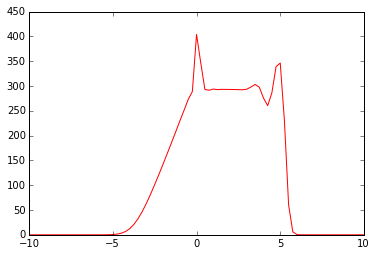

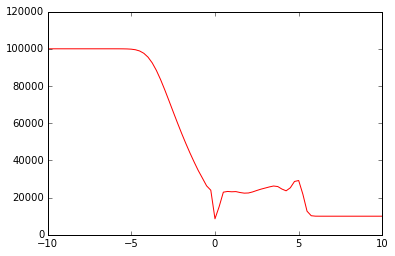

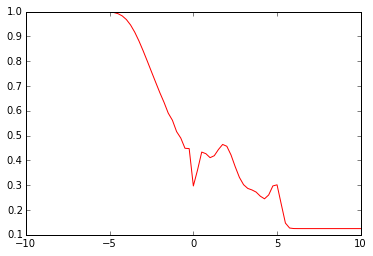

velocity at x=2.5 :  292.611471527
pressure at x=2.5 :  30250.8901676
density at x=2.5 :  0.374691402648


In [3]:
import numpy
from matplotlib import pyplot
%matplotlib inline

def u_initial(x):
    gamma=1.4
    n=len(x)
    
    U=numpy.zeros((3,n),dtype=float)

    
    ind=numpy.where(x<0)
    
    U[0,ind]=1
    U[0,ind[-1][-1]+1:]=0.125
    
    U[1,ind]=0.
    U[1,ind[-1][-1]+1:]=0.
    
    U[2,ind]=100000/(1.4-1)
    U[2,ind[-1][-1]+1:]=10000/(1.4-1)
    
    return U

#Defining "F" for richmyer method
def get_f(U):
    gamma=1.4
    n=len(U[0,:])
    
    F=numpy.zeros((3,n),dtype=float)
    
    F[0,:]=U[1,:]
    F[1,:]=(U[1,:]**2/U[0,:])+(gamma-1)*(U[2,:]-0.5*(U[1,:]**2/U[0,:]))	
    F[2,:]=(U[2,:]+(gamma-1)*(U[2,:]-0.5*(U[1,:]**2/U[0,:])))*(U[1,:]/U[0,:])
    
    return F


def solver(u, nt, dt, dx):
    ustar=u.copy()
    for i in range(nt):
        un=u.copy()
        F=get_f(un)
        ustar[:,:-1]=0.5*(un[:,1:]+un[:,:-1])-(dt/(2*dx))*(F[:,1:]-F[:,:-1])
        Fs=get_f(ustar)
        u[:,1:]=un[:,1:]-(dt/dx)*(Fs[:,1:]-Fs[:,:-1])
    return u

    

nx= 81
dx= 20.0/(nx-1)

dt=0.0002
nt=int(.01/dt)

x = numpy.linspace(-10.,10.,nx)
U = u_initial(x)
F = get_f(U)
u=solver(U,nt,dt,dx)

#Velocity
pyplot.figure
pyplot.plot(x,u[1,:]/u[0,:],'-r')
pyplot.show()

#Pressure
pyplot.figure
pyplot.plot(x,0.4*(u[2,:]-u[1,:]**2/u[0,:]),'-r')
pyplot.show()

#Density
pyplot.figure
pyplot.plot(x,u[0,:],'-r')
pyplot.show()

#Answers
index = numpy.abs(x-2.5).argmin()
print("velocity at x=2.5 : ",u[1,index]/u[0,index])
print("pressure at x=2.5 : ",.4*(u[2,index]-.5*(u[1,index]**2/u[0,index])))
print("density at x=2.5 : ", u[0,index])
